<a href="https://colab.research.google.com/github/Binho-do-Boa/Atividades_UFMT/blob/main/RandomForest_HiperParametros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [563]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

**Aqui Começa teste de predição Placed ou NoPlaced (Contratado ou Não Contratado)**

In [564]:
df = pd.read_csv('emprego.csv')


In [565]:
# Processamento dos dados
df = pd.get_dummies(df, columns=['hsc_s'])
df['sexo'] = pd.factorize(df['gender'])[0]
df['experiencia'] = pd.factorize(df['workex'])[0]
df['especializacao'] = pd.factorize(df['specialisation'])[0]

In [567]:
# Seleção das características e da variável alvo
x = df[['hsc_s_Arts', 'hsc_s_Commerce', 'hsc_s_Science', 'sexo', 'experiencia', 'especializacao','ssc_p', 'hsc_p']]
y = df['status']

In [568]:
# Normalização das características
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [569]:
# Balanceamento dos dados com SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x_scaled, y)

In [570]:
# Divisão Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.3, random_state=18)

In [571]:
randomdorest = RandomForestClassifier (n_estimators=100)
randomdorest.fit(X_train,y_train)

RandomForestClassifier()

In [572]:
# Ajuste de Hiper Parametros
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [4, 6, 8],
    'criterion': ['gini', 'entropy']
}

In [573]:
# Ajuste de Hiper Parametros
grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5)
grid_search_rf.fit(X_train, y_train)
best_rf = grid_search_rf.best_estimator_
best_rf.fit(X_train, y_train)
predicao_rf = best_rf.predict(X_test)

In [574]:
# Avaliação do modelo RandomForestClassifier
print("RandomForestClassifier - Confusion Matrix:")
print(confusion_matrix(y_test, predicao_rf))
print("\nRandomForestClassifier - Classification Report:")
print(classification_report(y_test, predicao_rf))
print("\nRandomForestClassifier - Accuracy Score:")
print(accuracy_score(y_test, predicao_rf))
print("\nRandomForestClassifier - Best Hyperparameters:")
print(grid_search_rf.best_params_)

RandomForestClassifier - Confusion Matrix:
[[41  4]
 [ 7 37]]

RandomForestClassifier - Classification Report:
              precision    recall  f1-score   support

  Not Placed       0.85      0.91      0.88        45
      Placed       0.90      0.84      0.87        44

    accuracy                           0.88        89
   macro avg       0.88      0.88      0.88        89
weighted avg       0.88      0.88      0.88        89


RandomForestClassifier - Accuracy Score:
0.8764044943820225

RandomForestClassifier - Best Hyperparameters:
{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 200}


**Aqui Começa teste de predição de Salário**

In [583]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
df2 = df.dropna()

In [584]:
# Remover salários acima de 440000
df2 = df2[df2['salary'] <= 440000]

In [585]:
x = df2[['hsc_s_Arts', 'hsc_s_Commerce', 'hsc_s_Science',  'experiencia', 'sexo', 'especializacao']]
y = df2['salary']

In [586]:
df2.head(10)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,sexo,experiencia,especializacao
0,1,M,67.00,Others,91.00,Others,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Placed,270000.0,False,True,False,0,0,0
1,2,M,79.33,Central,78.33,Others,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed,200000.0,False,False,True,0,1,1
2,3,M,65.00,Central,68.00,Central,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Placed,250000.0,True,False,False,0,0,1
4,5,M,85.80,Central,73.60,Central,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed,425000.0,False,True,False,0,0,1
7,8,M,82.00,Central,64.00,Central,66.00,Sci&Tech,Yes,67.00,Mkt&Fin,62.14,Placed,252000.0,False,False,True,0,1,1
8,9,M,73.00,Central,79.00,Central,72.00,Comm&Mgmt,No,91.34,Mkt&Fin,61.29,Placed,231000.0,False,True,False,0,0,1
10,11,M,58.00,Central,61.00,Central,60.00,Comm&Mgmt,Yes,62.00,Mkt&HR,60.85,Placed,260000.0,False,True,False,0,1,0
11,12,M,69.60,Central,68.40,Central,78.30,Comm&Mgmt,Yes,60.00,Mkt&Fin,63.70,Placed,250000.0,False,True,False,0,1,1
13,14,F,77.00,Central,87.00,Central,59.00,Comm&Mgmt,No,68.00,Mkt&Fin,68.63,Placed,218000.0,False,True,False,1,0,1
15,16,F,65.00,Central,75.00,Central,69.00,Comm&Mgmt,Yes,72.00,Mkt&Fin,64.66,Placed,200000.0,False,True,False,1,1,1


In [587]:
# Divisão Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=18)

In [588]:
rf_regressao = RandomForestRegressor(n_estimators=1000)
rf_regressao.fit(X_train, y_train)
predicao = rf_regressao.predict(X_test)

print('r2:', metrics.r2_score(y_test, predicao))
print('MAE:', metrics.mean_absolute_error(y_test, predicao))
print('MSE:', metrics.mean_squared_error(y_test, predicao))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predicao)))

r2: -0.4076919863362167
MAE: 38537.37048484408
MSE: 2765559746.412948
RMSE: 52588.589507733974


In [589]:
df3 = pd.DataFrame()
df3['Real'] = y_test
df3['Predição'] = predicao
df3.head(10)

,Real,Predição
193,300000.0,243436.790154
185,252000.0,262430.081313
62,240000.0,241471.301632
61,300000.0,284523.538315
66,275000.0,322736.496898
147,300000.0,284523.538315
73,218000.0,284523.538315
114,250000.0,322736.496898
26,240000.0,289663.836788
135,200000.0,262430.081313


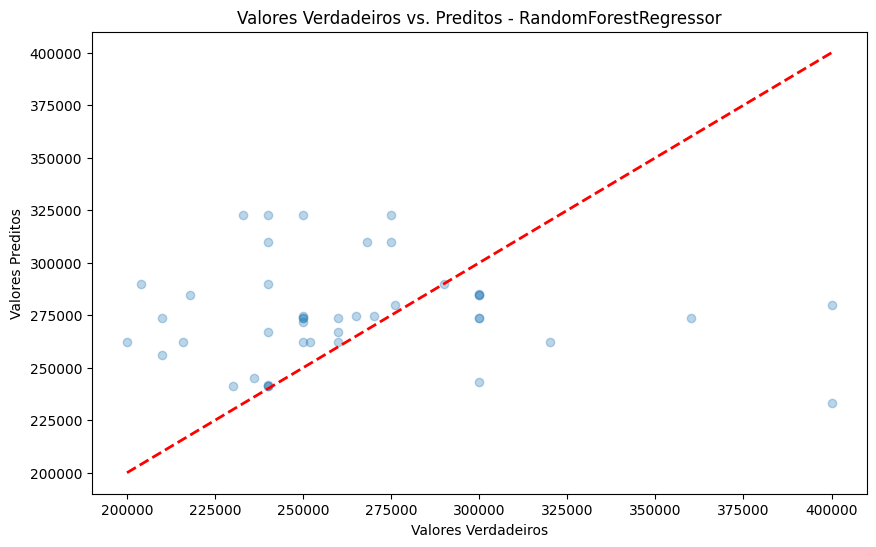

In [590]:
# Plotar os resultados
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predicao, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores Verdadeiros')
plt.ylabel('Valores Preditos')
plt.title('Valores Verdadeiros vs. Preditos - RandomForestRegressor')
plt.show()